In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
#load the data
data = sns.load_dataset("titanic")
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [8]:
data.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [12]:
#function to fill age with class mean
def fill_age_with_class_mean(df):
    df['age'] = df.groupby('class')['age'].transform(lambda x: x.fillna(x.mean()))
    return df


In [13]:
#function calls the fill_age_with_class_mean function
data = fill_age_with_class_mean(data)

C:\Users\qasim\AppData\Local\Temp\ipykernel_27476\2793141675.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['age'] = df.groupby('class')['age'].transform(lambda x: x.fillna(x.mean()))


In [16]:
#check if age is filled
data.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [18]:
#drop missingvalues in embarked
data = data.dropna(subset=['embarked'])

In [21]:
#install sklearn if not already installed
try:
    import sklearn      
except ImportError:
      %pip install scikit-learn
from sklearn.preprocessing import LabelEncoder


   ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
    --------------------------------------- 0.3/10.7 MB ? eta -:--:--
    --------------------------------------- 0.3/10.7 MB ? eta -:--:--
   - -------------------------------------- 0.5/10.7 MB 932.9 kB/s eta 0:00:11
   -- ------------------------------------- 0.8/10.7 MB 958.5 kB/s eta 0:00:11
   --- ------------------------------------ 1.0/10.7 MB 949.8 kB/s eta 0:00:11
   ---- ----------------------------------- 1.3/10.7 MB 958.5 kB/s eta 0:00:10
   ---- ----------------------------------- 1.3/10.7 MB 958.5 kB/s eta 0:00:10
   ----- ---------------------------------- 1.6/10.7 MB 964.5 kB/s eta 0:00:10
   ------ --------------------------------- 1.8/10.7 MB 958.5 kB/s eta 0:00:10
   ------ --------------------------------- 1.8/10.7 MB 958.5 kB/s eta 0:00:10
   ------- -------------------------------- 2.1/10.7 MB 844.8 kB/s eta 0:00:11
   ------- -------------------------------- 2.1/10.7 MB 844.8 kB/s eta 0:00:11


In [22]:
#apply label encoding to embarked
def encode_embarked(df):
    le = LabelEncoder()
    df['embarked'] = le.fit_transform(df['embarked'])
    return df
#apply label encoding to embarked
data = encode_embarked(data)
#check if embarked is encoded
data['embarked'].unique()

C:\Users\qasim\AppData\Local\Temp\ipykernel_27476\1946293993.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['embarked'] = le.fit_transform(df['embarked'])


array([2, 0, 1])

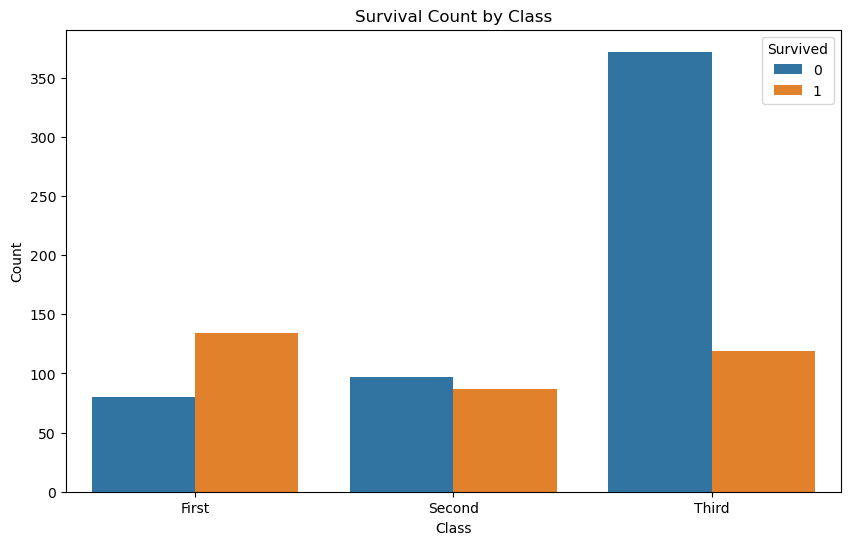

In [23]:
#now we can visualize the data
plt.figure(figsize=(10, 6))
sns.countplot(x='class', hue='survived', data=data)
plt.title('Survival Count by Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right')
plt.show()

In [27]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets

X = data.drop(columns=['survived'])

y = data['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [28]:
from sklearn.linear_model import LogisticRegression

# Initializing the logistic regression model

model = LogisticRegression()

# Training the model on the training data

model.fit(X_train, y_train)

ValueError: could not convert string to float: 'female'

In [ ]:
#convert gender to numeri




In [30]:
# Convert 'sex' column to numeric: male=0, female=1
for df in [X_train, X_test, X]:
      df['sex'] = df['sex'].map({'male': 0, 'female': 1})

In [ ]:
# apply logis

In [31]:
# Predict survival on the test set using the trained logistic regression model
y_pred = model.predict(X_test)

# Optionally, display the predicted values
print(y_pred)

ValueError: Input contains NaN

In [32]:
data.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           688
embark_town      0
alive            0
alone            0
dtype: int64

In [33]:
# Check for NaN values in X_train and X_test
print("NaNs in X_train:\n", X_train.isnull().sum())
print("NaNs in X_test:\n", X_test.isnull().sum())

# Drop columns with too many NaNs or fill NaNs with suitable values
# For simplicity, let's drop columns with many NaNs ('deck') and fill remaining NaNs with column means (for numeric columns)
cols_to_drop = ['deck']
X_train_clean = X_train.drop(columns=cols_to_drop)
X_test_clean = X_test.drop(columns=cols_to_drop)

# Fill numeric NaNs with column mean
for col in X_train_clean.select_dtypes(include=[np.number]).columns:
      mean_val = X_train_clean[col].mean()
      X_train_clean[col] = X_train_clean[col].fillna(mean_val)
      X_test_clean[col] = X_test_clean[col].fillna(mean_val)

# Now retrain the model
model.fit(X_train_clean, y_train)
y_pred = model.predict(X_test_clean)
print(y_pred)

NaNs in X_train:
 pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           560
embark_town      0
alive            0
alone            0
dtype: int64
NaNs in X_test:
 pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           128
embark_town      0
alive            0
alone            0
dtype: int64


ValueError: Cannot cast object dtype to float64

In [34]:
# Fill NaN values in 'data' DataFrame

# Drop 'deck' column due to too many NaNs
data_clean = data.drop(columns=['deck'])

# Fill numeric columns' NaNs with column mean
for col in data_clean.select_dtypes(include=[np.number]).columns:
      data_clean[col] = data_clean[col].fillna(data_clean[col].mean())

# For categorical/object columns, fill NaNs with mode
for col in data_clean.select_dtypes(include=['object', 'category']).columns:
      if data_clean[col].isnull().any():
            data_clean[col] = data_clean[col].fillna(data_clean[col].mode()[0])

# For boolean columns, fill NaNs with False (or choose another strategy)
for col in data_clean.select_dtypes(include=['bool']).columns:
      if data_clean[col].isnull().any():
            data_clean[col] = data_clean[col].fillna(False)

# Check if all NaNs are fixed
print(data_clean.isnull().sum())

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64


In [35]:
# Retrain the model using the cleaned training data and evaluate on the cleaned test data
model.fit(X_train_clean, y_train)
y_pred = model.predict(X_test_clean)
print(y_pred)

ValueError: Cannot cast object dtype to float64

In [36]:
data.describe()

,survived,pclass,age,sibsp,parch,fare,embarked
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.246290,0.524184,0.382452,32.096681,1.535433
std,0.486260,0.834700,13.176451,1.103705,0.806761,49.697504,0.792088
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800,1.000000
50%,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200,2.000000
75%,1.000000,3.000000,36.500000,1.000000,0.000000,31.000000,2.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,2.000000


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     889 non-null    int64   
 1   pclass       889 non-null    int64   
 2   sex          889 non-null    object  
 3   age          889 non-null    float64 
 4   sibsp        889 non-null    int64   
 5   parch        889 non-null    int64   
 6   fare         889 non-null    float64 
 7   embarked     889 non-null    int64   
 8   class        889 non-null    category
 9   who          889 non-null    object  
 10  adult_male   889 non-null    bool    
 11  deck         201 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        889 non-null    object  
 14  alone        889 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(5), object(4)
memory usage: 87.3+ KB


In [38]:
new_data=data[['age', 'class' , 'survived']]

In [40]:
new_data.head()

,age,class,survived
0,22.0,Third,0
1,38.0,First,1
2,26.0,Third,1
3,35.0,First,1
4,35.0,Third,0


In [41]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       889 non-null    float64 
 1   class     889 non-null    category
 2   survived  889 non-null    int64   
dtypes: category(1), float64(1), int64(1)
memory usage: 21.8 KB


In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Prepare features and target from new_data
X_new = new_data.drop(columns=['survived'])
y_new = new_data['survived']

# Split new_data into train and test sets
X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X_new, y_new, test_size=0.2, random_state=101)

# For logistic regression, convert 'class' to numeric
le_new = LabelEncoder()
for df in [X_new_train, X_new_test, X_new]:
      df['class'] = le_new.fit_transform(df['class'])

# Train the model on new training data
model.fit(X_new_train, y_new_train)

# Predict on new test data
y_new_pred = model.predict(X_new_test)
print(y_new_pred)

[0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 1
 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0 0 0 0 1 0 0 1 0
 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1
 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0]
